# Import tensorflow and other libraries

In [2]:
#to plot graphs
import matplotlib.pyplot as plt

#to arrays,list related operations
import numpy as np

#to run in the os
import os

#to open,manipulate and save image file formats
import PIL

#to perform various tasks focused on training and 
#inference of deep neural networks
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Download and explore the dataset

In [4]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 54s 0us/step


In [5]:
#count of images
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


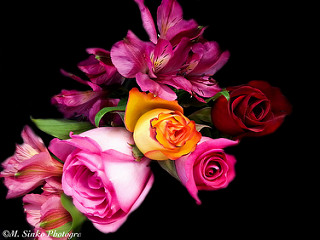

In [7]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[6]))

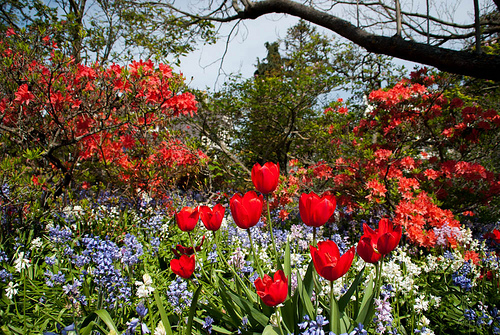

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[5]))

# Load using keras utility

In [10]:
batch_size = 32
img_height = 180
img_width = 180

In [11]:
#splitting dataset 80% for training and 20% for validation
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [12]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [13]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


# Visualize data

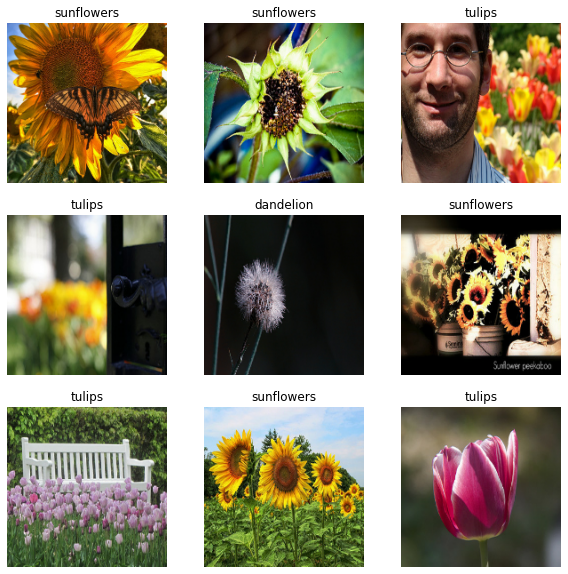

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [16]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [17]:
# batch of 32 images with shape 180x180x3, here 3 is for RGB color channels
#labels are corresponding labels for 32 images

In [18]:
#standarizing RGB values to [0,1] range
normalization_layer = layers.Rescaling(1./255)

In [19]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.99638706


# Model creation

In [20]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [23]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 44s 472ms/step - loss: 1.3846 - accuracy: 0.4162 - val_loss: 1.1301 - val_accuracy: 0.5341
Epoch 2/10
92/92 [==============================] - 39s 422ms/step - loss: 1.0259 - accuracy: 0.5926 - val_loss: 1.0009 - val_accuracy: 0.6117
Epoch 3/10
92/92 [==============================] - 39s 418ms/step - loss: 0.8614 - accuracy: 0.6696 - val_loss: 0.9522 - val_accuracy: 0.6253
Epoch 4/10
92/92 [==============================] - 43s 467ms/step - loss: 0.6883 - accuracy: 0.7425 - val_loss: 0.8638 - val_accuracy: 0.6907
Epoch 5/10
92/92 [==============================] - 44s 476ms/step - loss: 0.4715 - accuracy: 0.8266 - val_loss: 0.8752 - val_accuracy: 0.7044
Epoch 6/10
92/92 [==============================] - 41s 442ms/step - loss: 0.3003 - accuracy: 0.8961 - val_loss: 1.0113 - val_accuracy: 0.6744
Epoch 7/10
92/92 [==============================] - 41s 439ms/step - loss: 0.1565 - accuracy: 0.9489 - val_loss: 1.2575 - val_accuracy: 0.6676